<a href="https://colab.research.google.com/github/dustyattenborough/lectures-bigphys/blob/master/FDMex_re.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random
import time
from google.colab import files
import os
import torch
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FixedLocator, FormatStrFormatter
import pandas as pd



In [42]:
## 경계까지 하면 격자의 갯수는 N+2 by N+2
## 내부 격자의 갯수는 NxN개임
# 10 10 10 ...10 10
# 0  0  0  ... 0 0 
# .  .  .  .,, , .
# 0  0  0  ... 0 0
# 10 10 10 ...10 10
#############################

N=40
dh=1/N
nlist=[i+1 for i in range(N)]
Potential=[]
dotcharge=[]
Potential.append([20 for i in range(N+2)])  # 제일 위
dotcharge.append([0 for i in range(N+2)])
for j in range(N):
  Potential.append([0 for i in range(N+2)])
  dotcharge.append([0 for i in range(N+2)])
Potential.append([10 for i in range(N+2)]) #제일 아래
dotcharge.append([0 for i in range(N+2)])
#for kk in range(N):
  #Potential[kk][0]=10
  #Potential[kk][N+1]=10
#dotcharge[20][20]=-50000 # dotcharge>10: minus charge
#dotcharge[40][20]=-50000

In [43]:
# h=1/N
NN=1000 #시행횟수
Pot=[]
for tt in range(NN):
  for k in range(N):  #상하
    if tt==0:
      Pot.append([])
    for w in range(N): #좌우
      Potential[k+1][w+1]=round((Potential[k+1+1][w+1]+Potential[k+1-1][w+1]+Potential[k+1][w+1+1]+Potential[k+1][w+1-1]-dh*dh*dotcharge[k+1][w+1])/4,9)
      Pot[k].append(Potential[k+1][w+1])

In [44]:

x=[]
y=[]
z=[]

for q0 in range(N+2): #상하
  for q1 in range(N+2): #좌우
    if q0==0 and q0==N+1:
      z.append(10)
    elif q1==0 and q1==N+1:
      z.append(0)
    else:  
      z.append(1*Potential[q1][q0])
    x.append(q1)
    y.append(q0)

xn=np.array(x)
yn=np.array(y)
zn=np.array(z)


In [45]:
len(yn)

1764

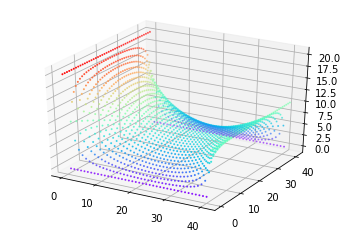

In [46]:
fig=plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(xn,yn,zn,s=1,c=zn, cmap='rainbow')


plt.show()

In [47]:
FDM={}
for n1 in range(N+2):
  FDM[n1]=[z[n1*(N+2)+kk] for kk in range(N+2)]

In [48]:
df=pd.DataFrame(FDM)
print(df)

    0          1          2          3   ...         38         39         40  41
0   20  20.000000  20.000000  20.000000  ...  20.000000  20.000000  20.000000  20
1    0   9.993266  13.939500  15.791671  ...  15.791735  13.939545   9.993289   0
2    0   6.033567   9.973073  12.424903  ...  12.425030   9.973163   6.033615   0
3    0   4.167940   7.494336   9.939447  ...   9.939636   7.494470   4.168010   0
4    0   3.143867   5.896907   8.134064  ...   8.134313   5.897084   3.143960   0
5    0   2.510638   4.815390   6.807512  ...   6.807819   4.815607   2.510754   0
6    0   2.083317   4.046534   5.811102  ...   5.811466   4.046792   2.083453   0
7    0   1.776118   3.476366   5.044231  ...   5.044649   3.476662   1.776275   0
8    0   1.544817   3.038625   4.440291  ...   4.440760   3.038957   1.544993   0
9    0   1.364556   2.693075   3.954955  ...   3.955472   2.693441   1.364749   0
10   0   1.220364   2.414217   3.558232  ...   3.558794   2.414615   1.220574   0
11   0   1.10271

포텐셜과 필드를 저장해보기


In [50]:
df.to_csv('FDM01.csv')